#**Семинар №4**

##Степанищев Степан, гр. 23171

Подключаем необходимые библиотеки

---


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Вводим данные задачи

---

In [197]:
d = {'LPH enzyme concentration': [1, 2, 3, 4, 5, 6], 'Glucoamylaze enzyme': [1, 3, 2, 5, 3, 4], 'TARGET': [-1, -1, -1, 1, 1, 1]}
df = pd.DataFrame(data=d)
df

,LPH enzyme concentration,Glucoamylaze enzyme,TARGET
0,1,1,-1
1,2,3,-1
2,3,2,-1
3,4,5,1
4,5,3,1
5,6,4,1


In [198]:
#supportive vectors
sup_V = [[2, 3], [5, 3]]
y_V = [-1, 1]

Ищем множители Лагранжа. Для 2х опорных векторов это делается совсем просто.

---

In [200]:
alpha = 0
for i in range(2):
    for j in range(2):
        alpha += (y_V[i]*y_V[j]*np.dot(sup_V[i],sup_V[j]))
alpha = 2/alpha
alpha

0.2222222222222222

Теперь можем найти вектор нормали к разделяющей прямой и смещение:

---

In [201]:
w = alpha*np.array(y_V[i]*sup_V[i]) + alpha*np.array(y_V[j]*sup_V[j])
b = 0.5*((y_V[0] - np.dot(w, sup_V[0])) + (y_V[1] - np.dot(w, sup_V[1])))
display(w, b)

array([2.22222222, 1.33333333])

-11.777777777777779

Теперь мы готовы классифицировать новые данные

---



In [202]:
def predict(x, w, b):
  y = []
  for i in range(len(x)):
    y.append(np.sign(np.dot(w,x[i]) + b))
  return y

In [203]:
test_X = np.array([[3,3], [3,4], [4,3]])
pred_Y = np.array([predict(test_X, w, b)])
pred_Y

array([[-1.,  1.,  1.]])

Рисуем

---


<ipython-input-205-804638ecb9eb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = df.append(tmp_df, ignore_index=True)


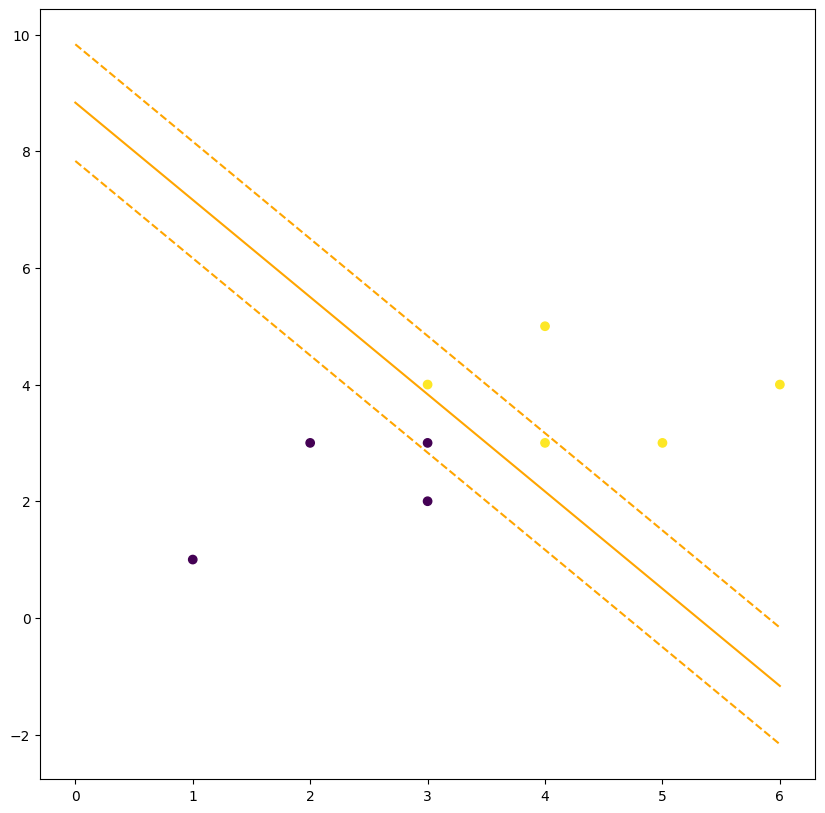

In [205]:
scale=10

tmp_arr=np.concatenate((test_X, pred_Y.T), axis = 1)
tmp_df=df3 = pd.DataFrame(data=tmp_arr, columns=df.columns)
tmp_df = df.append(tmp_df, ignore_index=True)

fig, ax = plt.subplots(figsize = (scale, scale))
ax.scatter(tmp_df['LPH enzyme concentration'], tmp_df['Glucoamylaze enzyme'], c = tmp_df['TARGET'])

grid = np.linspace(0, 6, 1000)
curve = -1 * (w[0] * grid + b)/w[1]
ax.plot(grid, curve, c = 'orange')
ax.plot(grid, curve + 1, c = 'orange', linestyle = 'dashed')
ax.plot(grid, curve - 1, c = 'orange', linestyle = 'dashed')

Делаем все то же самое для новой пары опорных векторов

---



<ipython-input-210-b2ab30305c6b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = df.append(tmp_df, ignore_index=True)


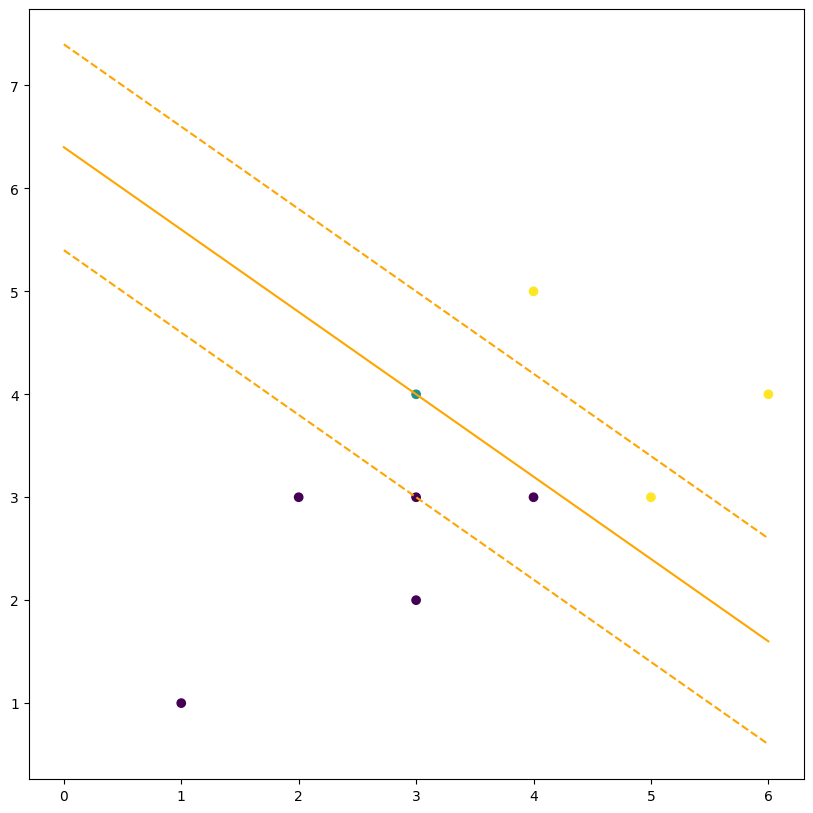

In [210]:
#supportive vectors
sup_V = [[2, 3], [4, 5]]
y_V = [-1, 1]

#alpha
alpha = 0
for i in range(2):
    for j in range(2):
        alpha += (y_V[i]*y_V[j]*np.dot(sup_V[i],sup_V[j]))
alpha = 2/alpha

#w,b
w = alpha*np.array(y_V[i]*sup_V[i]) + alpha*np.array(y_V[j]*sup_V[j])
b = 0.5*((y_V[0] - np.dot(w, sup_V[0])) + (y_V[1] - np.dot(w, sup_V[1])))

#predict
test_X = np.array([[3,3], [3,4], [4,3]])
pred_Y = np.array([predict(test_X, w, b)])

#plot
scale=10

tmp_arr=np.concatenate((test_X, pred_Y.T), axis = 1)
tmp_df=df3 = pd.DataFrame(data=tmp_arr, columns=df.columns)
tmp_df = df.append(tmp_df, ignore_index=True)

fig, ax = plt.subplots(figsize = (scale, scale))
ax.scatter(tmp_df['LPH enzyme concentration'], tmp_df['Glucoamylaze enzyme'], c = tmp_df['TARGET'])

grid = np.linspace(0, 6, 1000)
curve = -1 * (w[0] * grid + b)/w[1]
ax.plot(grid, curve, c = 'orange')
ax.plot(grid, curve + 1, c = 'orange', linestyle = 'dashed')
ax.plot(grid, curve - 1, c = 'orange', linestyle = 'dashed')

